In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('Agg')
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

sns.set_style(style= 'whitegrid')

In [3]:
#Loading data

data_path = "/home/baris/Desktop/music_recommendation_system/dataset/ai-powered-music-recommendation-system/music_sentiment_dataset.csv"
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

df.head()

,User_ID,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Tempo (BPM),Mood,Energy,Danceability
0,U1,Way ball purpose public experience recently re...,Sad,S1,Someone Like You,Adele,Pop,67,Melancholic,Low,Low
1,U2,Save officer two myself a.,Happy,S2,Happy,Pharrell Williams,Pop,160,Joyful,High,High
2,U3,Decade ahead everyone environment themselves a...,Relaxed,S3,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low
3,U4,Best change letter citizen try ask quality pro...,Happy,S4,Happy,Pharrell Williams,Pop,160,Joyful,High,High
4,U5,Worker player chance kind actually.,Happy,S5,Happy,Pharrell Williams,Pop,160,Joyful,High,High


In [7]:
#Data Cleaning and Preprocessing
print(df.info())
print(df.isnull().sum())

essential_columns = ["Sentiment_Label", "Tempo (BPM)", "Genre", "Mood", "Energy", "Danceability"]
df.dropna(subset=essential_columns, inplace=True)

#converting Tempo (BPM) column to numeric (if not already) and force errors to NaN for further cleaning
df["Tempo (BPM)"] = pd.to_numeric(df["Tempo (BPM)"], errors='coerce')

#After conversion, drop rows with NaN in 'Tempo (BPM)'
df.dropna(subset=["Tempo (BPM)"], inplace=True)

df.reset_index(drop=True, inplace=True)

#Display summary statistics for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_ID              1000 non-null   object
 1   User_Text            1000 non-null   object
 2   Sentiment_Label      1000 non-null   object
 3   Recommended_Song_ID  1000 non-null   object
 4   Song_Name            1000 non-null   object
 5   Artist               1000 non-null   object
 6   Genre                1000 non-null   object
 7   Tempo (BPM)          1000 non-null   int64 
 8   Mood                 1000 non-null   object
 9   Energy               1000 non-null   object
 10  Danceability         1000 non-null   object
dtypes: int64(1), object(10)
memory usage: 86.1+ KB
None
User_ID                0
User_Text              0
Sentiment_Label        0
Recommended_Song_ID    0
Song_Name              0
Artist                 0
Genre                  0
Tempo (BPM)            0


,Tempo (BPM)
count,1000.00000
mean,97.76000
std,36.74701
min,50.00000
25%,67.00000
50%,109.00000
75%,130.00000
max,160.00000


/tmp/ipykernel_10780/2935270509.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment_Label", palette="viridis")


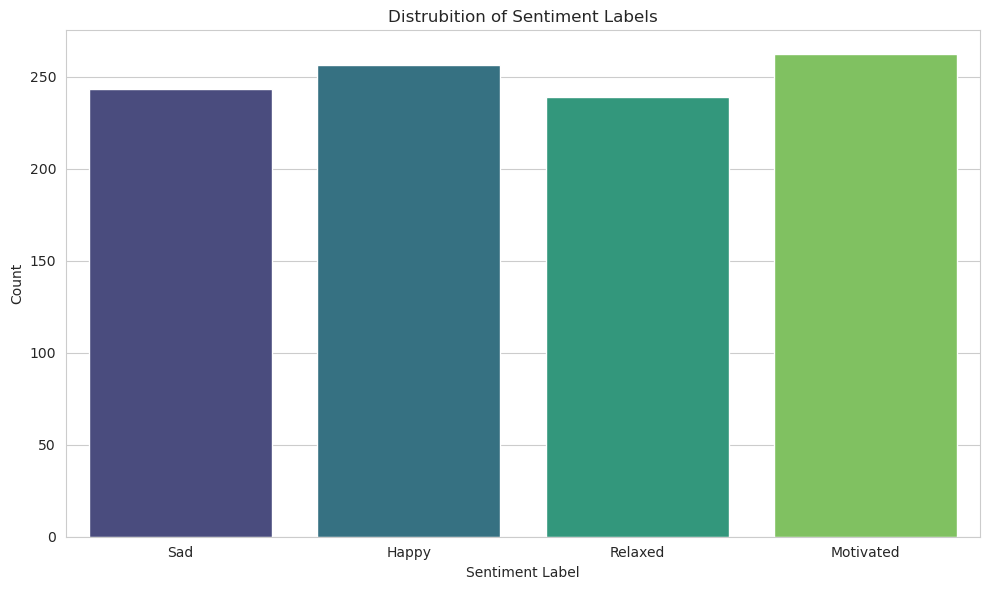

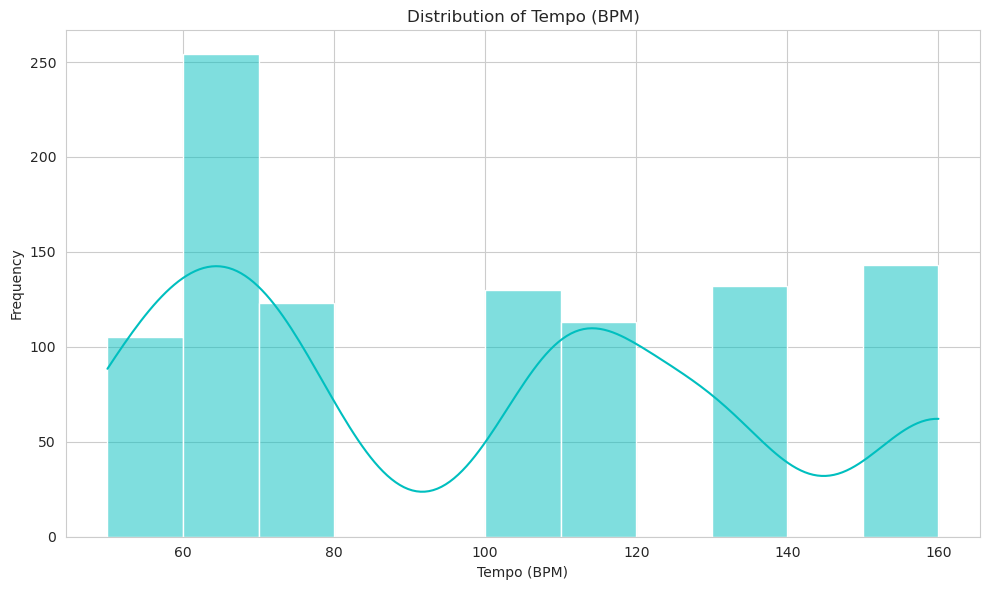

/tmp/ipykernel_10780/2935270509.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sentiment_Label", y="Tempo (BPM)", palette="Set3")


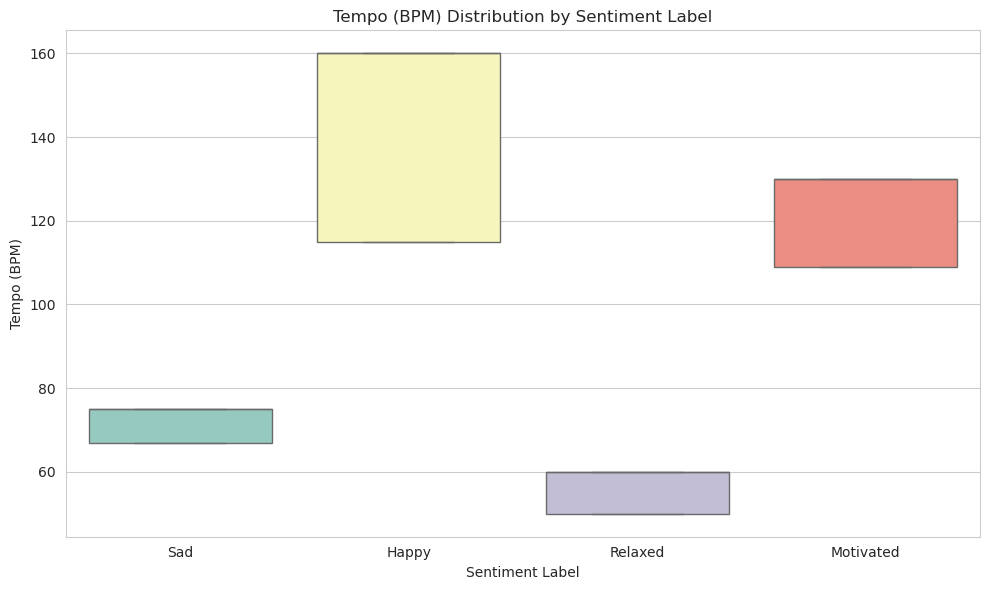

/tmp/ipykernel_10780/2935270509.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Genre", palette="coolwarm", order=df["Genre"].value_counts().index)


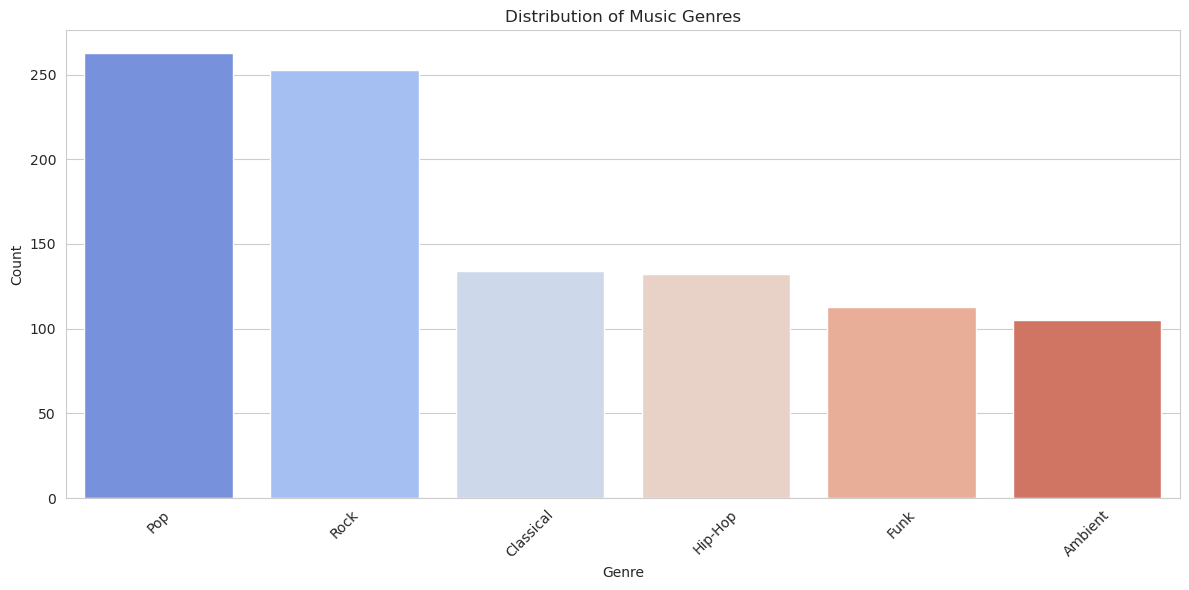

In [11]:
#EDA - Explatory Data Analysis
#Count Plot for Sentiment Labels
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Sentiment_Label", palette="viridis")
plt.title("Distrubition of Sentiment Labels")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#Histogram for Tempo(BPM)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Tempo (BPM)", kde=True, color='c')
plt.title("Distribution of Tempo (BPM)")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#Box Plot  of Tempo (BPM) grouped by Sentiment Label
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Sentiment_Label", y="Tempo (BPM)", palette="Set3")
plt.title("Tempo (BPM) Distribution by Sentiment Label")
plt.xlabel("Sentiment Label")
plt.ylabel("Tempo (BPM)")
plt.tight_layout()
plt.show()

#Count Plot for Genre
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Genre", palette="coolwarm", order=df["Genre"].value_counts().index)
plt.title("Distribution of Music Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Accuracy of the RandomForest model:  1.000000

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        51

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



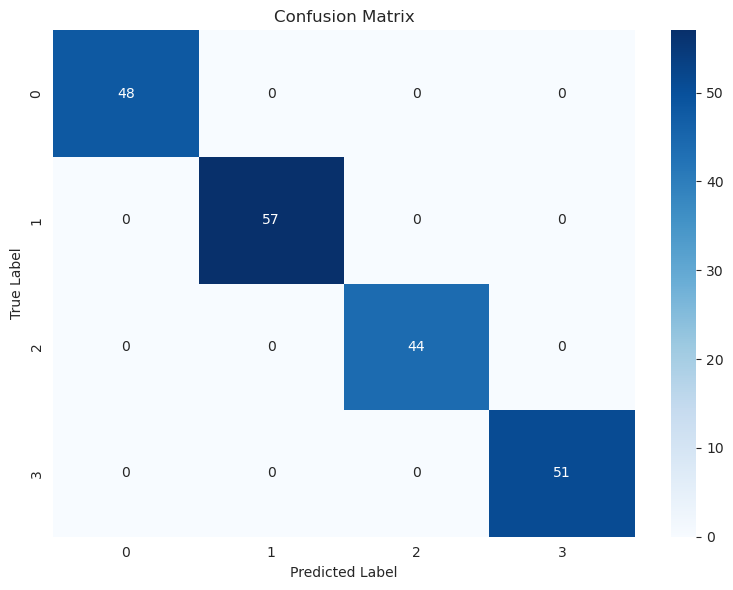

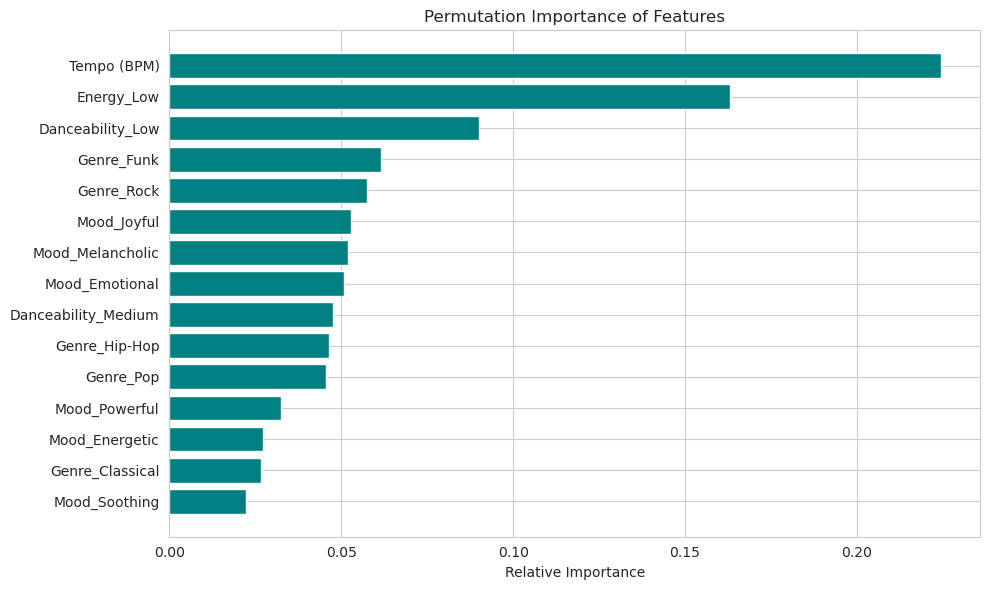

In [12]:
 #Predictive Modeling

#We aim to predict the 'Sentiment_Label'
#Selecting relevant features for prediction
#Include columns that are unlikely to be useful predictors such as IDs and textual descriptions

features = ['Tempo (BPM)', 'Genre', 'Mood', 'Energy', 'Danceability']
target = 'Sentiment_Label'

#Make a copy of dataframe for modeling
model_df = df[features + [target]].copy()

#Encode categorical variables. For simplicity, we use LabelEncoder for target, and pd.get_dummies for features
le = LabelEncoder()
model_df[target] = le.fit_transform(model_df[target])

#One-hot encode categorical features: Genre, Mood, Energy, Danceability
categorical_features = ['Genre', 'Mood', 'Energy', 'Danceability']
model_df = pd.get_dummies(model_df, columns=categorical_features, drop_first=True)

#Split data into training and testing sets
x = model_df.drop(target, axis=1)
y = model_df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

#make predictions and evaluate
y_pred = rf_model.predict(x_test)

#Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the RandomForest model: {accuracy: 4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

#Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#Permutation Importance visualization
importances = rf_model.feature_importances_
indices = np.argsort(importances)
feature_names = x.columns

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Permutation Importance of Features')
plt.tight_layout()
plt.show()